In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the dataset
dataset = pd.read_csv("train_dataset.csv")
X_train = dataset.iloc[:, 0:28].values
y_train = dataset.iloc[:, 28:38].values

print("X: \n", X_train)
print("y: ", y_train)





X: 
 [[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]]
y:  [[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 

In [3]:
import pandas as pd
import numpy as np

# Load the test dataset
dataset_path = "test_dataset.csv"
dataset = pd.read_csv(dataset_path)

# Set the parameters for adding noise
noise_mean = .1  # Adjust the mean to control the amount of noise
noise_std_dev = 0.2  # Adjust the standard deviation to control the amount of noise

# Add Gaussian noise to the dataset
noisy_data = dataset.copy()
num_features = dataset.shape[1]

# Apply noise to each feature except the last ten columns (assuming these are output values)
for column in dataset.columns[:-10]:
    noise = np.random.normal(noise_mean, noise_std_dev, dataset[column].shape)
    noisy_data[column] = dataset[column] + noise
    # Ensure values are within [0, 1] range
    noisy_data[column] = noisy_data[column].clip(0, 1)

# Save the noisy dataset to a new CSV file
noisy_dataset_path = "test_dataset_with_noise.csv"
noisy_data.to_csv(noisy_dataset_path, index=False)

print(f"Noisy dataset saved to: {noisy_dataset_path}")


test_dataset = pd.read_csv("test_dataset_with_noise.csv")

# Separating input features and target labels for testing
X_test = test_dataset.iloc[:, 0:28].values
y_test = test_dataset.iloc[:, 28:38].values
# Scaling the test features

Noisy dataset saved to: test_dataset_with_noise.csv


In [4]:
# Scaling the input features (Optional, but helps in faster convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Building the Neural Network
model = Sequential()

# Input layer and first hidden layer with 16 neurons and ReLU activation
model.add(Dense(64, input_dim=28, activation="relu"))

# Second hidden layer with 16 neurons and ReLU activation
model.add(Dense(32, activation="relu"))

# Output layer with 10 neurons (for each digit) and softmax activation
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model
model1 = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=35, batch_size=8)

Epoch 1/35
12/12 [==============================] - 1s 17ms/step - loss: 2.3314 - accuracy: 0.1196 - val_loss: 2.2048 - val_accuracy: 0.2333
Epoch 2/35
12/12 [==============================] - 0s 4ms/step - loss: 2.0925 - accuracy: 0.2717 - val_loss: 2.0651 - val_accuracy: 0.2778
Epoch 3/35
12/12 [==============================] - 0s 3ms/step - loss: 1.9234 - accuracy: 0.3913 - val_loss: 1.9380 - val_accuracy: 0.3444
Epoch 4/35
12/12 [==============================] - 0s 4ms/step - loss: 1.7652 - accuracy: 0.4674 - val_loss: 1.8174 - val_accuracy: 0.4556
Epoch 5/35
12/12 [==============================] - 0s 4ms/step - loss: 1.6146 - accuracy: 0.6087 - val_loss: 1.6940 - val_accuracy: 0.5889
Epoch 6/35
12/12 [==============================] - 0s 4ms/step - loss: 1.4594 - accuracy: 0.6848 - val_loss: 1.5679 - val_accuracy: 0.7000
Epoch 7/35
12/12 [==============================] - 0s 4ms/step - loss: 1.3090 - accuracy: 0.7826 - val_loss: 1.4410 - val_accuracy: 0.7333
Epoch 8/35
12/12 [=

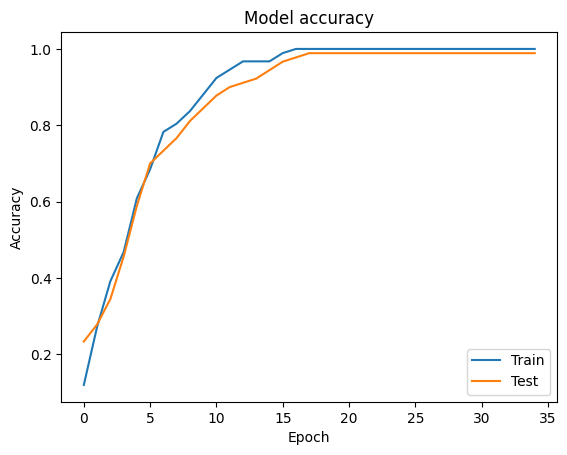

In [6]:
import matplotlib.pyplot as plt

plt.plot(model1.history["accuracy"])
plt.plot(model1.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="lower right")
plt.show()

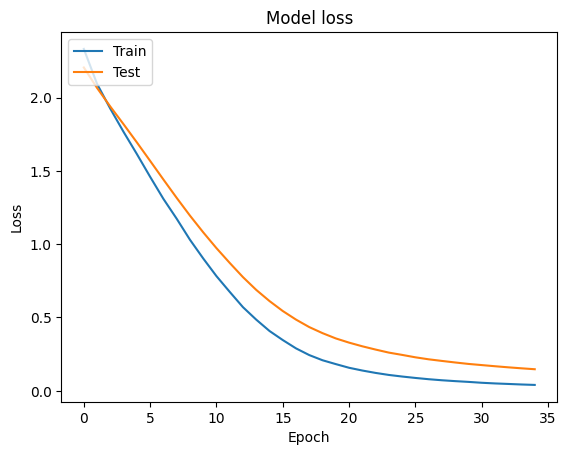

In [7]:
plt.plot(model1.history["loss"])
plt.plot(model1.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

3/3 [==============================] - 0s 1ms/step


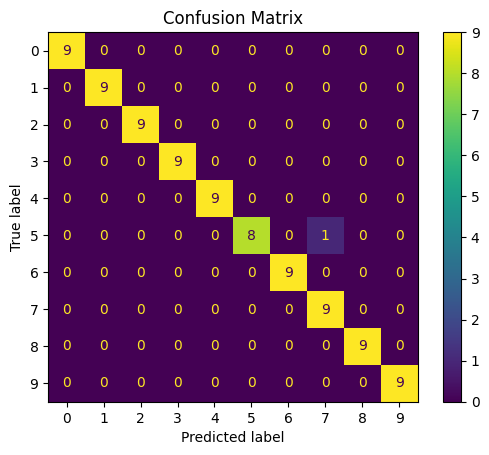

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicting on test data
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

# Creating confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Evaluating the model performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Manually entering input for prediction
manual_input = np.array(
    [
        [
            0,
            0,
            1,
            0,
            0,
            1,
            1,
            0,
            1,
            0,
            1,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            1,
            0,
        ]
    ]
)
manual_input_scaled = scaler.transform(manual_input)

# Predicting the class for the manual input
prediction = model.predict(manual_input_scaled)
print(f"Prediction for the manual input: {prediction}")
predicted_class_index = np.argmax(prediction, axis=1)
predicted_class = (predicted_class_index[0] + 1) % 10
print(f"Predicted class for the manual input: {predicted_class}")

# Saving the model for future use
model.save("digit_recognition_model.h5")

3/3 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9889
Test Accuracy: 98.89%
1/1 [==============================] - 0s 28ms/step
Prediction for the manual input: [[9.8054117e-01 1.8962740e-03 8.0429791e-03 9.9774927e-04 1.2211582e-03
  2.6228367e-03 3.0096637e-03 4.3862278e-04 4.3438899e-04 7.9519890e-04]]
Predicted class for the manual input: 1


In [10]:
import tkinter as tk

# Initialize the main window
root = tk.Tk()
root.title("4x7 Grid - Click to Toggle Cells")

# Constants
ROWS = 7
COLS = 4

# Store the cell states (0 for white, 1 for black)
grid_data = [[0 for _ in range(COLS)] for _ in range(ROWS)]


# Function to toggle cell color and update grid data
def toggle_cell(row, col):
    # Toggle the cell state between 0 and 1
    grid_data[row][col] = 1 - grid_data[row][col]

    # Update the cell color
    color = "black" if grid_data[row][col] == 1 else "white"
    cells[row][col].configure(bg=color)


# Function to convert the grid to a vector and display it
def convert_to_vector():
    vector = [grid_data[row][col] for row in range(ROWS) for col in range(COLS)]
    vector_str = ",".join(map(str, vector))

    # Clear the Entry widget and insert the new vector string
    vector_entry.delete(0, tk.END)
    vector_entry.insert(0, vector_str)


# Create cells (buttons) and add them to the grid
cells = []
for row in range(ROWS):
    row_cells = []
    for col in range(COLS):
        cell = tk.Button(
            root,
            width=4,
            height=2,
            bg="white",
            command=lambda r=row, c=col: toggle_cell(r, c),
        )
        cell.grid(row=row, column=col)
        row_cells.append(cell)
    cells.append(row_cells)

# Convert button
convert_button = tk.Button(root, text="Convert", command=convert_to_vector)
convert_button.grid(row=ROWS, column=0, columnspan=COLS, pady=10)

# Entry to display and allow copying of the vector
vector_entry = tk.Entry(root, width=28, justify="center")
vector_entry.grid(row=ROWS + 1, column=0, columnspan=COLS, pady=10)

# Run the application
root.mainloop()